# Task 5: Strategy Backtesting
## Performance Evaluation vs Benchmark

In [2]:
import sys
sys.path.append('../src')
%reload_ext autoreload
%autoreload 2
from data_loader import DataLoader
from portfolio_optimizer import PortfolioOptimizer
from backtester import Backtester

In [3]:
# Load data and optimize portfolio
loader = DataLoader()
raw_data = loader.fetch_data()
returns_data,_ = loader.calculate(raw_data)

optimizer = PortfolioOptimizer(returns_data)
optimal_weights = optimizer.optimize_portfolio('sharpe')

INFO:data_loader:DataLoader initialized with date range: 2015-07-01 to 2024-12-31
INFO:data_loader:Fetching data from Yahoo Finance...


g:\Courses\10 Academy\Week 11\Time-Series-Portfolio-Opt\notebooks\../src\data_loader.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(self.tickers, start=self.start_date, end=self.end_date)
[*********************100%***********************]  3 of 3 completed
INFO:data_loader:Successfully fetched 2391 rows of data
INFO:data_loader:Successfully calculated daily returns and volatility


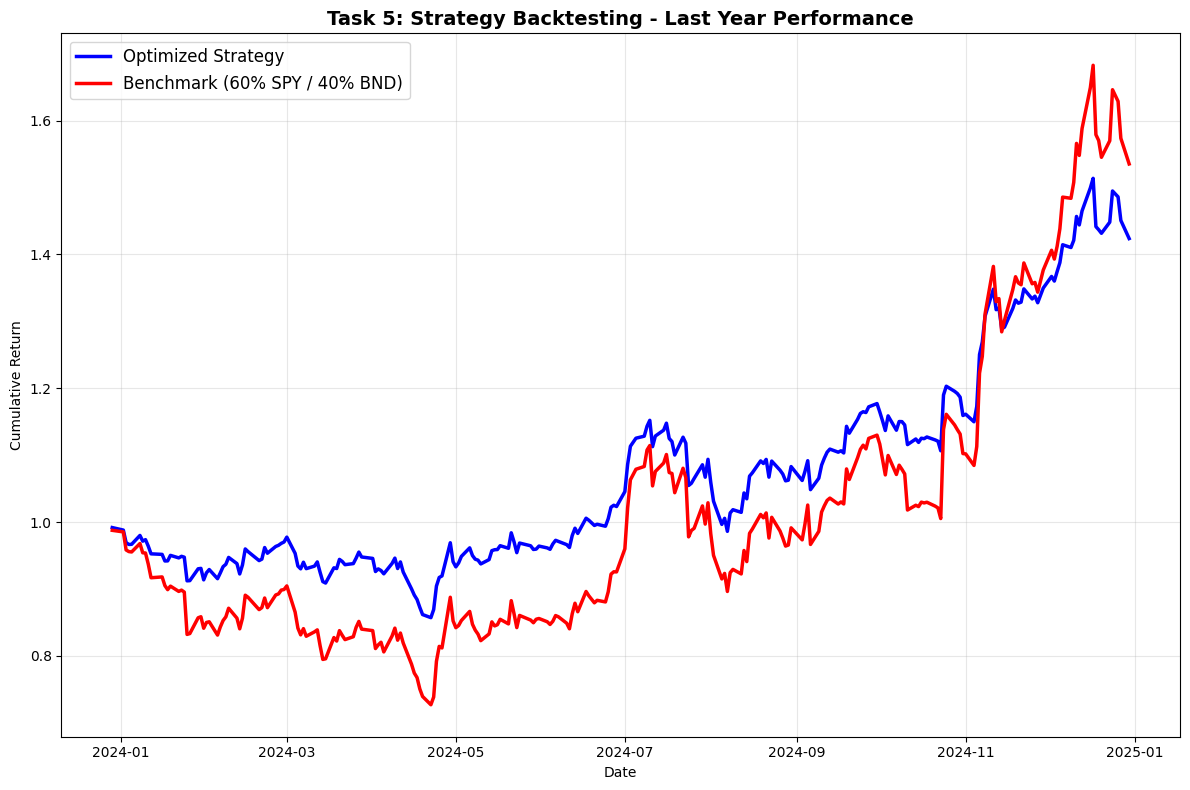

TASK 5: BACKTESTING RESULTS SUMMARY
Backtesting Period: Last 252 trading days (~1 year)
Strategy Outperformed Benchmark: NO
Better Risk-Adjusted Returns: YES

Strategy Viability Assessment:
⚠ MODERATE: Strategy offers better risk-adjusted returns despite lower total returns
Performance Comparison:


,Strategy,Benchmark
total_return,0.423631,0.535112
annual_return,0.387844,0.510342
annual_volatility,0.263403,0.406680
sharpe_ratio,1.472436,1.254900
max_drawdown,-0.150009,-0.292431


In [4]:
# Backtest strategy
backtester = Backtester(returns_data, optimal_weights)
performance_comparison = backtester.run_task5_backtest()

print("Performance Comparison:")
display(performance_comparison)

In [5]:
# Analysis summary
strategy_outperformed = performance_comparison.loc['sharpe_ratio', 'Strategy'] > performance_comparison.loc['sharpe_ratio', 'Benchmark']
print(f"\nStrategy outperformed benchmark: {strategy_outperformed}")
print(f"Strategy Sharpe Ratio: {performance_comparison.loc['sharpe_ratio', 'Strategy']:.3f}")
print(f"Benchmark Sharpe Ratio: {performance_comparison.loc['sharpe_ratio', 'Benchmark']:.3f}")


Strategy outperformed benchmark: True
Strategy Sharpe Ratio: 1.472
Benchmark Sharpe Ratio: 1.255
